# I - Description du problème

Dans ce notebook, on va commencer par analyser les attributs contenus dans la table "teamAttributes" afin de pouvoir faire le choix des attributs pour représenter mon vecteur d'équipe dans le notebook PARTIE 2. <br>

# II - Préparation des données et Code

In [3]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
import math

In [4]:
playerattributes = pd.DataFrame(data=pd.read_csv("../donnees_soccer/playerattributes.csv", sep=","))
players=pd.DataFrame(data=pd.read_csv("../donnees_soccer/player.csv", sep=","))
players_id = np.unique(playerattributes[["player_api_id"]])
teamattributes = pd.DataFrame(data=pd.read_csv("../donnees_soccer/teamattributes.csv", sep=","))

In [5]:
teamattributes.columns

Index(['id', 'team_fifa_api_id', 'team_api_id', 'date', 'buildUpPlaySpeed',
       'buildUpPlaySpeedClass', 'buildUpPlayDribbling',
       'buildUpPlayDribblingClass', 'buildUpPlayPassing',
       'buildUpPlayPassingClass', 'buildUpPlayPositioningClass',
       'chanceCreationPassing', 'chanceCreationPassingClass',
       'chanceCreationCrossing', 'chanceCreationCrossingClass',
       'chanceCreationShooting', 'chanceCreationShootingClass',
       'chanceCreationPositioningClass', 'defencePressure',
       'defencePressureClass', 'defenceAggression', 'defenceAggressionClass',
       'defenceTeamWidth', 'defenceTeamWidthClass',
       'defenceDefenderLineClass'],
      dtype='object')

On remarque en préparant les données, que dans la table TeamAttributes, chaque attribut numérique a son associé qui représente la classe (exemple : 'chanceCreationPassing', 'chanceCreationPassingClass'). Ce serait donc util de voir pour chaque stratégie il y a combien de classes distincts qui représentent les valeurs numériques

## On va donc voir pour chaque stratégie, il y a combien de classes distincts, et si une équipe donnée suit toujours la meme strategie ou non

In [6]:
def nbDistinctClasses(attribut):
    var = teamattributes[[attribut]]
    return (var.drop_duplicates().values.tolist())

In [7]:
#cette fonction compte le nombre de classes auxquels une équipe a pu appartenir pendant tous les match qu'elle a joué
def nbStratEquipe(attribut):
    var = teamattributes[["team_api_id", attribut]].drop_duplicates()
    var = var.groupby('team_api_id').count()
    plt.hist(var.values)
    plt.show()

# III - Protocole Expérimentale

## REMARQUE:
## Les histogrammes construits dans la suite représenteront le nombre d'équipes qui suivent 1, 2 ou 3 classes distincts de stratégies (selon la stratégie étudiée) pendant le total des match qu'ils ont joué.

## buildUpPlaySpeed

In [8]:
tmp = nbDistinctClasses("buildUpPlaySpeedClass")
print(tmp)
print(str(len(tmp)) + " classes distincts")

[['Balanced'], ['Fast'], ['Slow']]
3 classes distincts


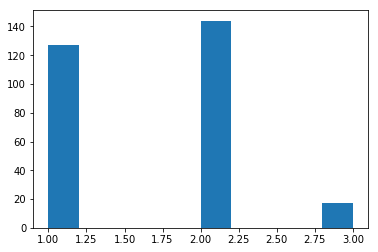

In [9]:
nbStratEquipe("buildUpPlaySpeedClass")

## buildUpPlayDribbling

In [10]:
tmp = nbDistinctClasses("buildUpPlayDribblingClass")
print(tmp)
print(str(len(tmp)) + " classes distincts")

[['Little'], ['Normal'], ['Lots']]
3 classes distincts


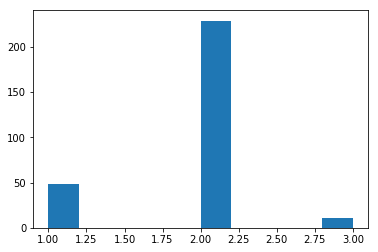

In [11]:
nbStratEquipe("buildUpPlayDribblingClass")

## buildUpPlayPassing

In [12]:
tmp = nbDistinctClasses("buildUpPlayPassingClass")
print(tmp)
print(str(len(tmp)) + " classes distincts")

[['Mixed'], ['Long'], ['Short']]
3 classes distincts


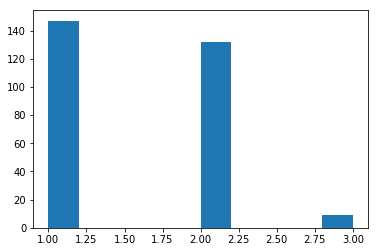

In [13]:
nbStratEquipe("buildUpPlayPassingClass")

## buildUpPlayPositioningClass

In [14]:
tmp = nbDistinctClasses("buildUpPlayPositioningClass")
print(tmp)
print(str(len(tmp)) + " classes distincts")

[['Organised'], ['Free Form']]
2 classes distincts


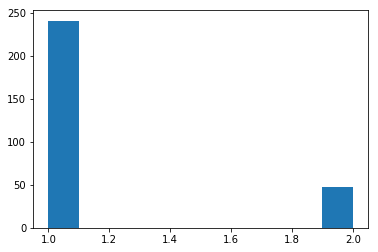

In [15]:
nbStratEquipe("buildUpPlayPositioningClass")

## chanceCreationPassing

In [16]:
tmp = nbDistinctClasses("chanceCreationPassingClass")
print(tmp)
print(str(len(tmp)) + " classes distincts")

[['Normal'], ['Risky'], ['Safe']]
3 classes distincts


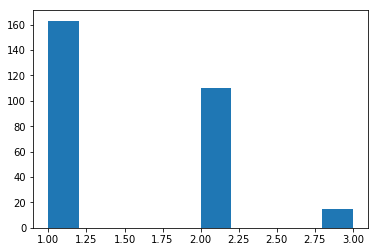

In [17]:
nbStratEquipe("chanceCreationPassingClass")

## chanceCreationCrossing

In [18]:
tmp = nbDistinctClasses("chanceCreationCrossingClass")
print(tmp)
print(str(len(tmp)) + " classes distincts")

[['Normal'], ['Lots'], ['Little']]
3 classes distincts


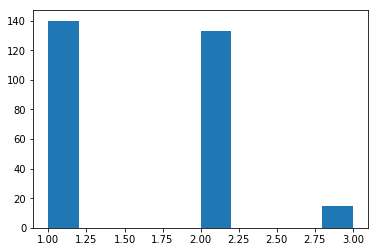

In [19]:
nbStratEquipe("chanceCreationCrossingClass")

## chanceCreationShooting

In [20]:
tmp = nbDistinctClasses("chanceCreationShootingClass")
print(tmp)
print(str(len(tmp)) + " classes distincts")

[['Normal'], ['Lots'], ['Little']]
3 classes distincts


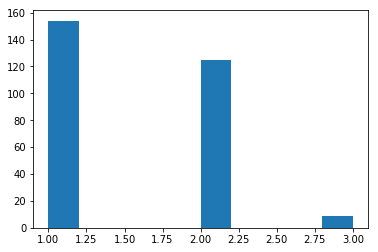

In [21]:
nbStratEquipe("chanceCreationShootingClass")

## chanceCreationPositioningClass

In [22]:
tmp = nbDistinctClasses("chanceCreationPositioningClass")
print(tmp)
print(str(len(tmp)) + " classes distincts")

[['Organised'], ['Free Form']]
2 classes distincts


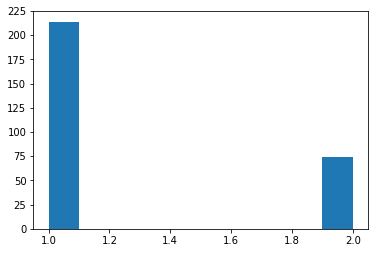

In [23]:
nbStratEquipe("chanceCreationPositioningClass")

## defencePressure

In [24]:
tmp = nbDistinctClasses("defencePressureClass")
print(tmp)
print(str(len(tmp)) + " classes distincts")

[['Medium'], ['Deep'], ['High']]
3 classes distincts


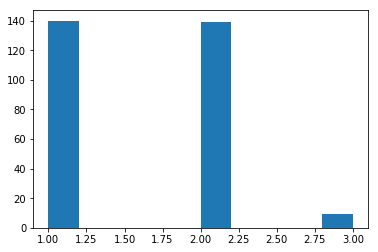

In [25]:
nbStratEquipe("defencePressureClass")

## defenceAggression

In [26]:
tmp = nbDistinctClasses("defenceAggressionClass")
print(tmp)
print(str(len(tmp)) + " classes distincts")

[['Press'], ['Double'], ['Contain']]
3 classes distincts


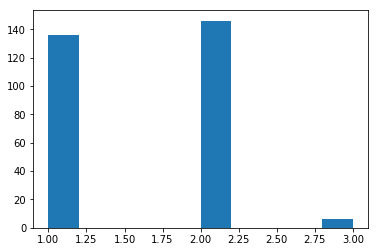

In [27]:
nbStratEquipe("defenceAggressionClass")

## defenceTeamWidth

In [28]:
tmp = nbDistinctClasses("defenceTeamWidthClass")
print(tmp)
print(str(len(tmp)) + " classes distincts")

[['Normal'], ['Wide'], ['Narrow']]
3 classes distincts


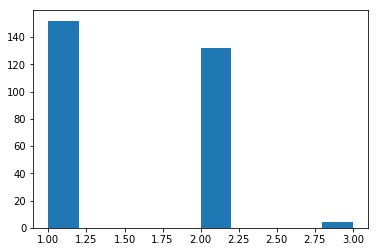

In [29]:
nbStratEquipe("defenceTeamWidthClass")

## defenceDefenderLineClass

In [30]:
tmp = nbDistinctClasses("defenceDefenderLineClass")
print(tmp)
print(str(len(tmp)) + " classes distincts")

[['Cover'], ['Offside Trap']]
2 classes distincts


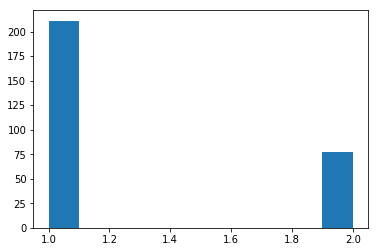

In [31]:
nbStratEquipe("defenceDefenderLineClass")

# IV - Conclusion :

On peut conclure à partir des histogrammes construits , que pour chaque stratégie, il y a que 2 ou 3 classes qui la repésente. Et pendant tous les match, la plupart des équipes sont toujours en 1 ou 2 classes de chaque attribut. Et il y a que quelques équipes qui appartiennt à 3 classes pendant tous les match joués. <br>
Pour cela, dans le notebook PARTIE 2, on étudiera l'effet des différents classes sur les victoires des équipes
